In [10]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

## Question 14

In [3]:
## Import Stock Market Data

## Import advertisting dataset
boston = pd.read_csv('..\..\datasets\Boston.csv', index_col='Unnamed: 0')
display(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
## a) Create a binary variable crim01 that contains a 1 if crim contains a value above its median and 0 if crim contains a value below it's median

boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)

display(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [5]:
## b) Explore the data graphically in order to investigate the association between crim01 and the other features. Which features seem most likely to be useful in predictio crim01

boston.corr()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


In [7]:
boston.crim01.value_counts()

0    253
1    253
Name: crim01, dtype: int64

In [8]:
## c) Split the data into a train and test set
## Realized I didn't drop the mpg column in the previous example which is why accurracy was so great. Dropping crim here

X = boston.drop(columns=['crim', 'zn', 'chas', 'rm', 'ptratio', 'black', 'lstat', 'medv'])
y = boston.crim01

scaler = StandardScaler()
encoder = LabelEncoder()

X = scaler.fit_transform(X)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

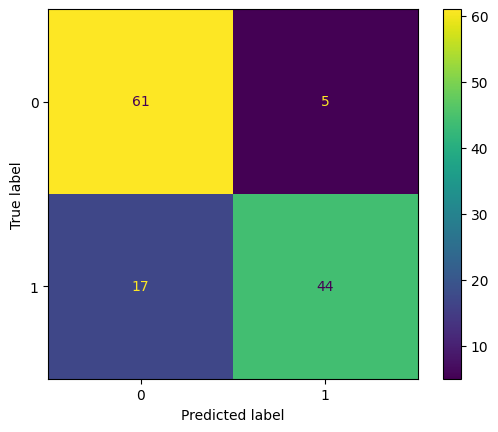

Accuracy: 0.8267716535433071
Recall: 0.7213114754098361
Precision: 0.8979591836734694


In [17]:
## d) Perform LDA. What is the test Error? 

clf = LinearDiscriminantAnalysis().fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

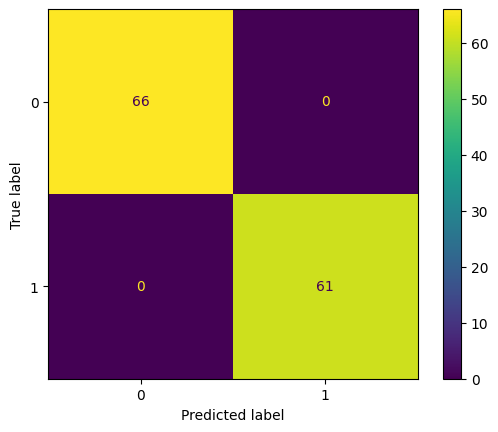

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [13]:
## f) Perform Logistic Regression

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

## Logistic regression predicts with perfect accuracy

Prior Probs:
 [0.49340369 0.50659631] 

Class Means:
 [[-0.62689335 -0.72129022 -0.58420249  0.6179512  -0.62259277 -0.61258297
  -1.        ]
 [ 0.60572783  0.76442691  0.60916352 -0.63151353  0.56373314  0.56232841
   1.        ]] 



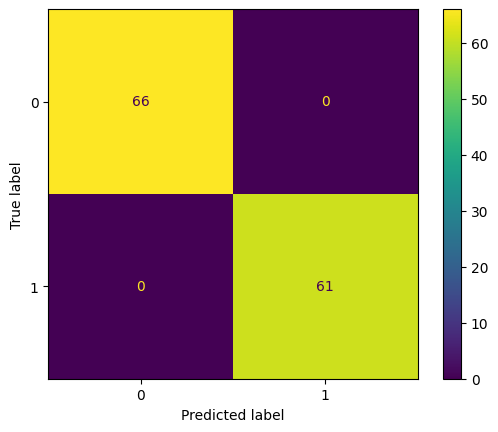

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [14]:
## g) Perform Naive Bayes

clf = GaussianNB().fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Prior Probs:\n', clf.class_prior_, '\n')

print('Class Means:\n', clf.theta_, '\n')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))

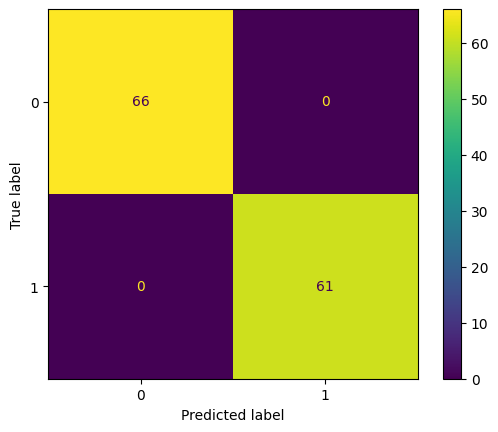

Accuracy:
 1.0
Recall: 1.0
Precision: 1.0


In [21]:
## h) Perform KNN

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(f'Accuracy:\n', accuracy_score(y_test,y_pred))

print('Recall:', recall_score(y_test, y_pred))

print('Precision:', precision_score(y_test, y_pred))